In [182]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [183]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [184]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [185]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.00644356037006,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005096539991454,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.00500749392627,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004986007371864,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [186]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [187]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [188]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [189]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957


In [190]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [191]:
# Задача 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). 
#Найти количество уникальных имен.

# 1.1. Убираю постфикс (dir.) - список всех участников команд
new_data = data['crew'].str.replace('dir.', ' ')
new_data = new_data.str.replace('(', ' ')
new_data = new_data.str.replace(')', ' ')
new_data = new_data.str.replace(r'\s+(?=(?:[,.?!:;…]))', r'')
new_data.head()

<ipython-input-191-422b33f75294>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data = data['crew'].str.replace('dir.', ' ')
<ipython-input-191-422b33f75294>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data = new_data.str.replace('(', ' ')
<ipython-input-191-422b33f75294>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_data = new_data.str.replace(')', ' ')
<ipython-input-191-422b33f75294>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data = new_data.str.replace(r'\s+(?=(?:[,.?!:;…]))', r'')


0        Frank Darabont, Tim Robbins, Morgan Freeman
1     Francis Ford Coppola, Marlon Brando, Al Pacino
2    Christopher Nolan, Christian Bale, Heath Ledger
3    Francis Ford Coppola, Al Pacino, Robert De Niro
4             Sidney Lumet, Henry Fonda, Lee J. Cobb
Name: crew, dtype: object

In [192]:
#1.2. Найти количество уникальных имен.

from collections import Counter
new_data.value_counts().head(10)
crew = []
for value in new_data.tolist():
    crew.extend(value.split(","))

print("Было: ", len(crew))
crew_unique = Counter(crew).keys()
print("Стало: ", len(crew_unique))


Было:  750
Стало:  536


In [193]:
#Задача 2. Получить список всех директоров. Построить распределение (визуализация обязательна) 
#и найти директора(ов), у которого(ых) больше всего фильмов в топе.

# 2.1. Получить список всех директоров.
d_crew = []
for value in data['crew'].tolist():
  d_crew.extend(value.split(","))
#d_crew
directors = []
for dir in d_crew:
  if 'dir.' in dir:
    directors.extend(dir.split(","))
print(directors)

data['directors'] = directors
data.head()


['Frank Darabont (dir.)', 'Francis Ford Coppola (dir.)', 'Christopher Nolan (dir.)', 'Francis Ford Coppola (dir.)', 'Sidney Lumet (dir.)', 'Steven Spielberg (dir.)', 'Peter Jackson (dir.)', 'Quentin Tarantino (dir.)', 'Peter Jackson (dir.)', 'Sergio Leone (dir.)', 'Robert Zemeckis (dir.)', 'David Fincher (dir.)', 'Peter Jackson (dir.)', 'Christopher Nolan (dir.)', 'Irvin Kershner (dir.)', 'Lana Wachowski (dir.)', 'Martin Scorsese (dir.)', 'Milos Forman (dir.)', 'David Fincher (dir.)', 'Akira Kurosawa (dir.)', 'Frank Capra (dir.)', 'Jonathan Demme (dir.)', 'Fernando Meirelles (dir.)', 'Steven Spielberg (dir.)', 'Roberto Benigni (dir.)', 'Christopher Nolan (dir.)', 'Frank Darabont (dir.)', 'George Lucas (dir.)', 'James Cameron (dir.)', 'Robert Zemeckis (dir.)', 'Hayao Miyazaki (dir.)', 'Alfred Hitchcock (dir.)', 'Roman Polanski (dir.)', 'Bong Joon Ho (dir.)', 'Luc Besson (dir.)', 'Roger Allers (dir.)', 'Ridley Scott (dir.)', 'Tony Kaye (dir.)', 'Martin Scorsese (dir.)', 'Bryan Singer (di

,movies,ratings,crew,links,title,year,directors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont (dir.)
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola (dir.)
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan (dir.)
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,Francis Ford Coppola (dir.)
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet (dir.)


In [194]:
# 2.2. Построить распределение
 
from collections import Counter
dir_movies = data.directors.value_counts()
dir_top = pd.DataFrame(dir_movies)
dir_top


,directors
Martin Scorsese (dir.),7
Akira Kurosawa (dir.),7
Christopher Nolan (dir.),7
Steven Spielberg (dir.),7
Stanley Kubrick (dir.),7
...,...
Jean-Pierre Jeunet (dir.),1
Orson Welles (dir.),1
Elem Klimov (dir.),1
Thomas Vinterberg (dir.),1


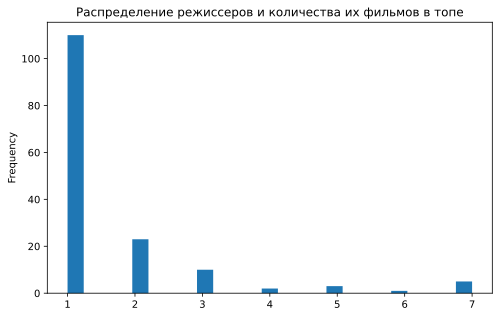

In [195]:
# 2.3. Визуализация

dir_top['directors'].plot.hist(bins=25, title='Распределение режиссеров и количества их фильмов в топе')

In [196]:
# 2.4. Найти директора(ов), у которого(ых) больше всего фильмов в топе.

top_top = dir_top.head(10)
top_top

,directors
Martin Scorsese (dir.),7
Akira Kurosawa (dir.),7
Christopher Nolan (dir.),7
Steven Spielberg (dir.),7
Stanley Kubrick (dir.),7
Alfred Hitchcock (dir.),6
Quentin Tarantino (dir.),5
Billy Wilder (dir.),5
Charles Chaplin (dir.),5
Hayao Miyazaki (dir.),4


In [197]:
# Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

film_crew = []
for value in new_data.tolist():
  film_crew.extend(value.split(", "))
film_crew

film_crew_pd = pd.DataFrame(film_crew)

film_crew_pd

from collections import Counter
cr = film_crew_pd.value_counts()
cr_top = pd.DataFrame(cr)
cr_top.head(10)

,0
0,
Charles Chaplin,10
Robert De Niro,9
Clint Eastwood,8
Steven Spielberg,7
Martin Scorsese,7
Christopher Nolan,7
Stanley Kubrick,7
Akira Kurosawa,7
Alfred Hitchcock,6


In [198]:
# Задача 4. Построить распределение топовых фильмов по годам

from collections import Counter

years = [year for value in data['year'].tolist() for year in value.split(",")]
from collections import Counter

top_y = data.year.value_counts()
y_top = pd.DataFrame(top_y)
y_top


,year
1995,8
2004,7
2009,6
1957,6
2003,6
...,...
1941,1
1936,1
1972,1
1964,1


In [199]:
#Задача 5. Построить распределение топовых фильмов рейтингу:
#Округлить до сотых и отрисовать
#Округлить до десятых и отрисовать
#Округлить до целых и отрисовать

# 5.1. Округляю рейтинги

#data.ratings

#data.ratings.round(1)


rate1 = []
for i in data.ratings:
  i = float(i)
  r = round(i, 2)
  rate1.append(r)
#print(rate)

data['rate (0.00)'] = rate1

rate2 = []
for i in data.ratings:
  i = float(i)
  r = round(i, 1)
  rate2.append(r)
#print(rate)

data['rate (0.0)'] = rate2

rate3 = []
for i in data.ratings:
  i = float(i)
  r = round(i)
  rate3.append(r)
#print(rate)

data['rate (0)'] = rate3
data
#  #ro = str(r)
#  #rate.extend(ro)
#print(rate)

#data['directors'] = directors
#data.head()

#round(2.85, 1)

,movies,ratings,crew,links,title,year,directors,rate (0.00),rate (0.0),rate (0)
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont (dir.),9.24,9.2,9
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola (dir.),9.16,9.2,9
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan (dir.),8.99,9.0,9
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,Francis Ford Coppola (dir.),8.98,9.0,9
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet (dir.),8.95,9.0,9
...,...,...,...,...,...,...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.00644356037006,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/,Dersu Uzala,1975,Akira Kurosawa (dir.),8.01,8.0,8
246,"[\n 247.\n , [The Iron Giant], \n, [...",8.005096539991454,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/,The Iron Giant,1999,Brad Bird (dir.),8.01,8.0,8
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.00500749392627,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/,The Help,2011,Tate Taylor (dir.),8.01,8.0,8
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.004986007371864,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/,Aladdin,1992,Ron Clements (dir.),8.00,8.0,8


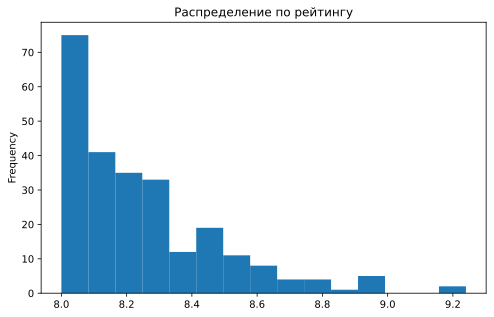

In [200]:
# 5.2. Отрисовываю рейтинг (до сотых)

data['rate (0.00)'].plot.hist(bins=15, title='Распределение по рейтингу')


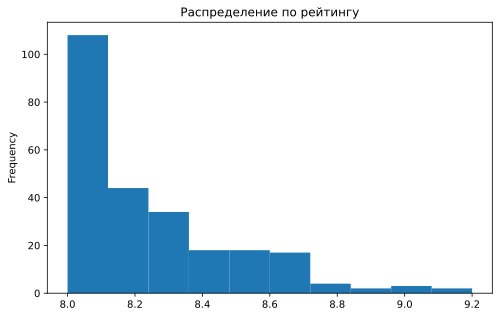

In [201]:
# 5.3. Отрисовываю рейтинг (до десятых)
data['rate (0.0)'].plot.hist(bins=10, title='Распределение по рейтингу')

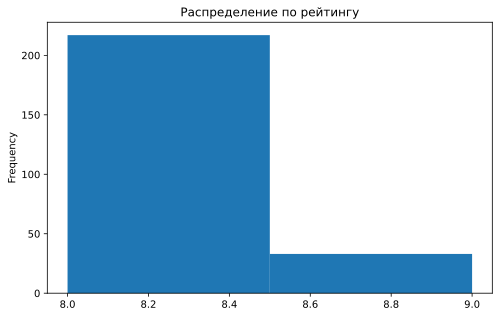

In [202]:
# 5.4. Отрисовываю рейтинг (до целых)
data['rate (0)'].plot.hist(bins=2, title='Распределение по рейтингу')

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [224]:
# не понимаю, в чем ошибка, никак не получается

from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

site= "https://www.imdb.com/title/tt0068646/"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)
soup.find_all(attrs={"name": "description"})[0].get("content")
print(soup)

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1671394984867);
        }
    })</script><title>The Godfather (1972) - IMDb</title><meta content="The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his

In [205]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text
 html_text

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n'

In [210]:
film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url)
soup = BeautifulSoup(html_text.text, 'lxml')
html_text
soup
#soup = BeautifulSoup(html_text, 'lxml')
#soup.find_all(attrs={"name": "description"})[0].get("content")

#url = 'http://www.imdb.com/chart/top'
#response = requests.get(url)
#soup = BeautifulSoup(response.text, 'lxml')
#movies = soup.select('td.titleColumn')
#links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
#crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
#ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
#data_frame = {
#    "movies": movies,
#    "ratings": ratings,
#    "crew": crew,
#    "links": links
#}

#data = pd.DataFrame(data_frame)
#data

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
</body>
</html>

In [214]:
data.head()

,movies,ratings,crew,links,title,year,directors,rate (0.00),rate (0.0),rate (0)
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295302824147,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,Frank Darabont (dir.),9.24,9.2,9
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156796944336,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,Francis Ford Coppola (dir.),9.16,9.2,9
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989611447303155,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,Christopher Nolan (dir.),8.99,9.0,9
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051496230078,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,Francis Ford Coppola (dir.),8.98,9.0,9
4,"[\n 5.\n , [12 Angry Men], \n, [(195...",8.951093012232297,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 Angry Men,1957,Sidney Lumet (dir.),8.95,9.0,9


In [220]:
from urllib.request import Request, urlopen

#site= "http://www.imdb.com/title/tt0068646/"
#hdr = {'User-Agent': 'Mozilla/5.0'}
#req = Request(site,headers=hdr)
#page = urlopen(req)
#soup = BeautifulSoup(page)
#soup.find_all(attrs={"name": "description"})[0].get("content")
#print(soup)


for film in data.links[0]:
  s = links
  site = f'http://www.imdb.com/{s}'
  hdr = {'User-Agent': 'Mozilla/5.0'}
  req = Request(site, headers = hdr)
  page = urlopen(req)
  soup = BeautifulSoup(page)
  soup.find_all(attrs={"name": "description"})[0].get("content")
print(soup)

InvalidURL: ignored

In [174]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

IndexError: ignored

In [204]:
desc = []
#for i in data:
#film_url = 'http://www.imdb.com/' + data.links[index]

cats = ["description"]
datattt = requests.get(f"http://www.imdb.com/title/tt0068646/")
datattt.text

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n'

In [203]:
data.links[1]

'/title/tt0068646/'


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)
